# **Bank Transaction Dataset for Fraud Detection**


Data Source : Bank Transaction Dataset for Fraud Detection ([Kaggle](https://www.kaggle.com/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection))

# **1. Import Library**

*Library* [`pandas`](https://pandas.pydata.org) to read, write and process data in table form using DataFrame.

*Library* [`matplotlib`](https://matplotlib.org/) to create data visualizations such as bar graphs, lines, scatter plots, etc.

*Library* [`seaborn`](https://seaborn.pydata.org/) to drawing attractive and informative statistical graphics.

*Library* [`sklearn.preprocessing`](https://scikit-learn.org/1.5/modules/preprocessing.html) to Converting category data (text) into numbers so that it can be processed by machine learning algorithms and Normalize or standardize data so that the distribution is more balanced.

*Library* [`sklearn.cluster`](https://scikit-learn.org/stable/modules/clustering.html) to Perform clustering with K-Means and DBSCAN.

*Library* [`sklearn.ensemble`](https://scikit-learn.org/stable/modules/ensemble.html) & [`xgboost`](https://xgboost.readthedocs.io/en/stable/) to select the most important features in a dataset based on how much they influence the prediction.

*Library* [`sklearn.metrics`](https://scikit-learn.org/1.5/api/sklearn.metrics.html) to Evaluating clustering with Silhouette Score.



In [253]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import xgboost as xgb

# **2. Data Loading**

In [254]:
data = pd.read_csv('bank_transactions_data_2.csv')
data

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,TX002508,AC00297,856.21,2023-04-26 17:09:36,Credit,Colorado Springs,D000625,21.157.41.17,M072,Branch,33,Doctor,109,1,12690.79,2024-11-04 08:11:29
2508,TX002509,AC00322,251.54,2023-03-22 17:36:48,Debit,Tucson,D000410,49.174.157.140,M029,Branch,48,Doctor,177,1,254.75,2024-11-04 08:11:42
2509,TX002510,AC00095,28.63,2023-08-21 17:08:50,Debit,San Diego,D000095,58.1.27.124,M087,Branch,56,Retired,146,1,3382.91,2024-11-04 08:08:39
2510,TX002511,AC00118,185.97,2023-02-24 16:24:46,Debit,Denver,D000634,21.190.11.223,M041,Online,23,Student,19,1,1776.91,2024-11-04 08:12:22


In [255]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

# **3. Exploratory Data Analysis (EDA)**

In [256]:
data.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


In [257]:
data.isnull().sum()

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

In [258]:
data.duplicated().sum()

np.int64(0)

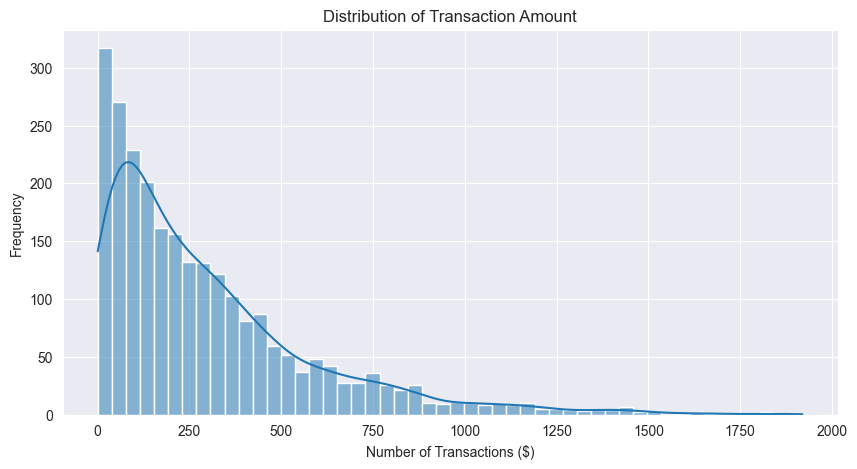

In [259]:
plt.figure(figsize=(10, 5))
sns.histplot(data['TransactionAmount'], bins=50, kde=True)
plt.title("Distribution of Transaction Amount")
plt.xlabel("Number of Transactions ($)")
plt.ylabel("Frequency")
plt.show()

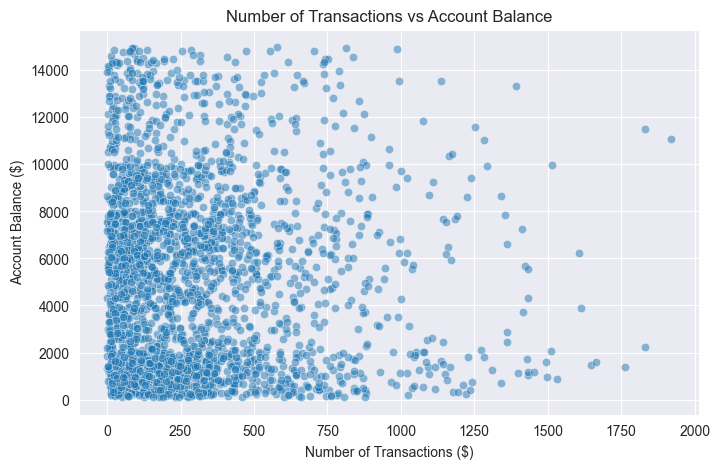

In [260]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data['TransactionAmount'], y=data['AccountBalance'], alpha=0.5)
plt.title("Number of Transactions vs Account Balance")
plt.xlabel("Number of Transactions ($)")
plt.ylabel("Account Balance ($)")
plt.show()

1. Clean data without missing values or duplication.
2. It is necessary to normalize the numerical features before clustering.
3. Feature selection can be done to select the most influential features.

# **4. Data Preprocessing**

In [261]:
data_clean = data.drop(columns=['TransactionID', 'AccountID', 'TransactionDate', 'PreviousTransactionDate', 'DeviceID', 'IP Address', 'MerchantID', 'Location'])

In [262]:
categorical_cols = ['TransactionType', 'Channel', 'CustomerOccupation']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data_clean[col] = le.fit_transform(data_clean[col])
    label_encoders[col] = le

<Axes: >

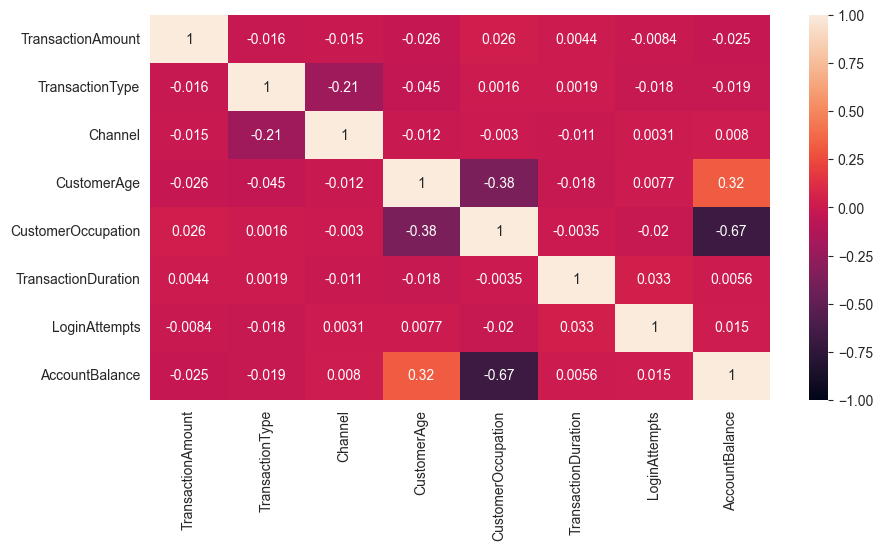

In [263]:
plt.figure(figsize=(10, 5))
sns.heatmap(data_clean.corr(), vmin=-1, vmax=1, annot=True)

In [264]:
numerical_cols = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
scaler = MinMaxScaler()
data_clean[numerical_cols] = scaler.fit_transform(data_clean[numerical_cols])

1. Deleting unnecessary columns, namely TransactionID, AccountID, TransactionDate, PreviousTransactionDate, DeviceID, IP Address, MerchantID, Location columns.
2. TransactionType, Channel, CustomerOccupation columns are converted to numbers using Label Encoding.
3. TransactionAmount, CustomerAge, TransactionDuration, LoginAttempts, AccountBalance columns are normalized using StandardScaler.

# **5. Clustering Model Development**

## **a. Clustering Model Development**

In [265]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
data_clean['Cluster_KMeans'] = kmeans.fit_predict(data_clean)

In [266]:
dbscan = DBSCAN(eps=0.8, min_samples=10)
data_clean['Cluster_DBSCAN'] = dbscan.fit_predict(data_clean)

1. Each data is given a cluster label in the Cluster_KMeans column.
2. The model divides the data into 4 clusters (0, 1, 2, 3).
3. The Cluster_DBSCAN column contains clustering results using DBSCAN.
4. The value -1 indicates outliers or noise, while the other numbers indicate the clusters found.

## **b. Evaluasi Model Clustering**

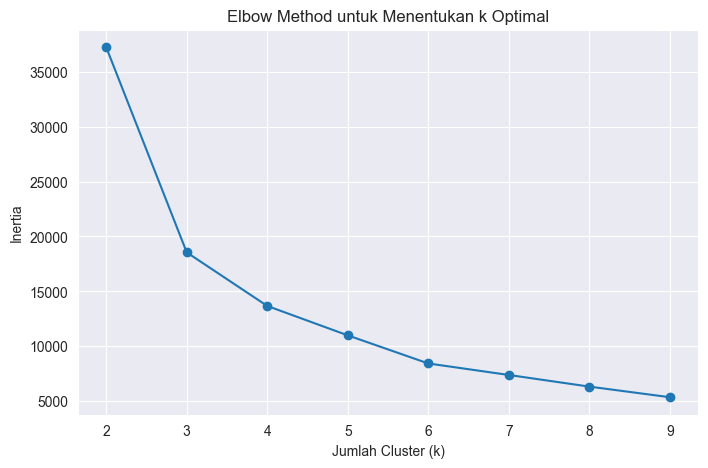

In [267]:
inertia = []
silhouette_scores = []
k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(data_clean)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_clean, cluster_labels))

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method untuk Menentukan k Optimal')
plt.show()

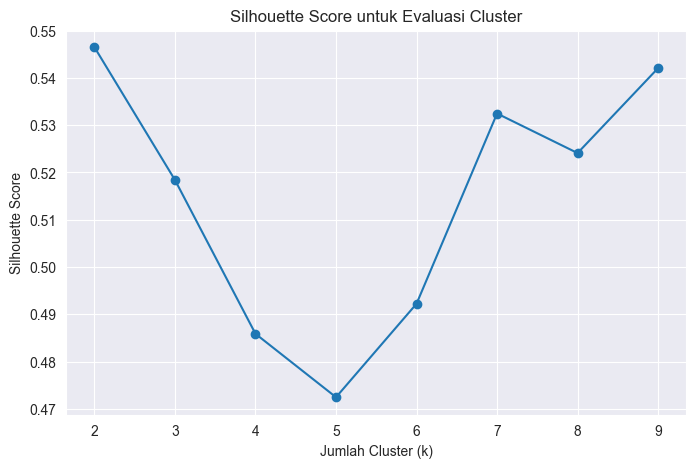

In [268]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Evaluasi Cluster')
plt.show()

1. Based on the Elbow Method, a good number of clusters is k=4 because after that the decrease in inertia slows down.
2. Based on Silhouette Score, k=2 or k=9 has the highest value, but too few or too many clusters may not be ideal.

## **c. Feature Selection**

In [269]:
X = data_clean.drop(columns=['Cluster_KMeans', 'Cluster_DBSCAN'])
y = data_clean['Cluster_KMeans']
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(data_clean.drop(columns=['Cluster_KMeans', 'Cluster_DBSCAN']), data_clean['Cluster_KMeans'])
feature_importances = pd.DataFrame({'Feature': data_clean.columns[:-2], 'Importance': rf.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

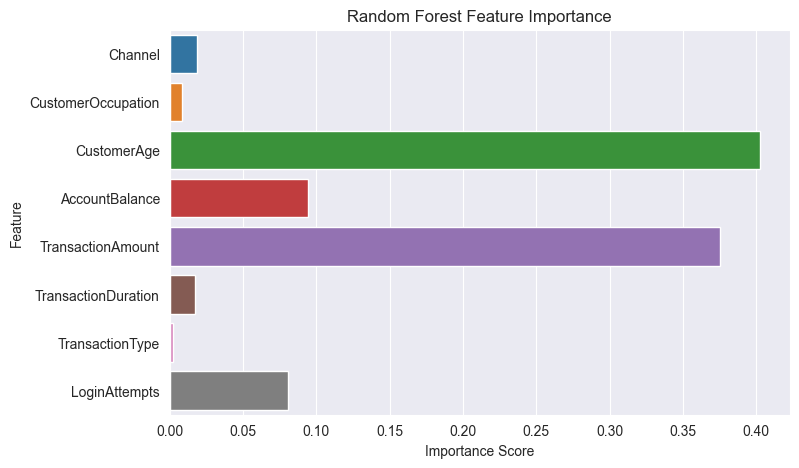

In [270]:
plt.figure(figsize=(8, 5))
sns.barplot(x=rf.feature_importances_, y='Feature', hue='Feature', data=feature_importances, dodge=False, legend=False)
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

In [271]:
feature_selection = ['CustomerAge', 'AccountBalance', 'LoginAttempts', 'TransactionAmount', 'CustomerOccupation']
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data_clean['Cluster_KMeans'] = kmeans.fit_predict(data_clean[feature_selection])
X = data_clean[feature_selection]
y = data_clean['Cluster_KMeans']
silhouette_scores = silhouette_score(X, y)
silhouette_scores

np.float64(0.6669154605284383)

1. The CustomerAge and TransactionAmount features are very influential, so they can be used as main variables in the model.
2. Silhouette Score shows that clustering with k=4 is quite good.

In [272]:
X = data_clean.drop(columns=['Cluster_KMeans', 'Cluster_DBSCAN'])
y = data_clean['Cluster_KMeans']
xgboost = xgb.XGBClassifier(eval_metric='mlogloss', random_state=42)
xgboost.fit(X, y)

xgb_importances = xgboost.feature_importances_
xgb_importances_df = pd.DataFrame({'Feature': data_clean.columns[:-2], 'XGBoost Importance': xgb_importances})
xgb_importances_df = xgb_importances_df.sort_values(by='XGBoost Importance', ascending=False)

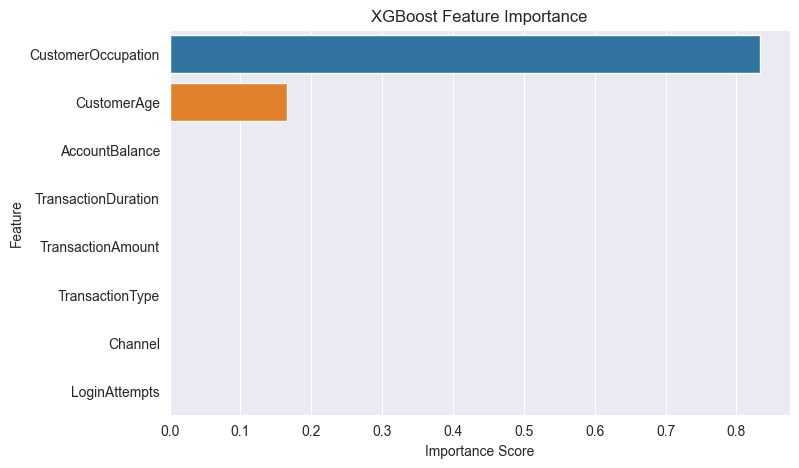

In [273]:
plt.figure(figsize=(8, 5))
sns.barplot(x='XGBoost Importance', y='Feature', hue='Feature', data=xgb_importances_df, dodge=False, legend=False)
plt.title("XGBoost Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

In [274]:
feature_selection = ['CustomerOccupation', 'CustomerAge']
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data_clean['Cluster_KMeans'] = kmeans.fit_predict(data_clean[feature_selection])
X = data_clean[feature_selection]
y = data_clean['Cluster_KMeans']
silhouette_scores = silhouette_score(X, y)
silhouette_scores


np.float64(0.8500169056680599)

1. CustomerOccupation and CustomerAge are the most relevant features according to XGBoost.
2. A high Silhouette Score indicates better clustering compared to the previous feature.

## **d. Visualization of Clustering Results**

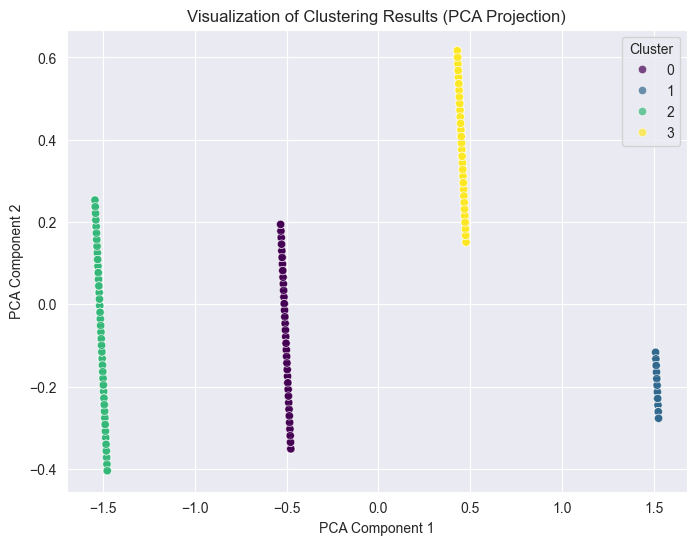

In [275]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data_clean[['CustomerOccupation', 'CustomerAge']])
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = data_clean['Cluster_KMeans']
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_df['PCA1'], y=pca_df['PCA2'], hue=pca_df['Cluster'], palette='viridis', alpha=0.7)
plt.title("Visualization of Clustering Results (PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

1. There are 4 cluster groups that are quite clearly separated.
2. The clusters appear vertically separated, indicating that the features used (CustomerOccupation and CustomerAge) are effective in forming clusters.
3. The clusters look quite separate, which means the clustering results are quite good.

## **e. Analysis and Interpretation of Cluster Results**

### Target Interpretation

1. Many suspicious transactions come from retired people with quite high ages (80, 61, 53 years).
2. It is necessary to check whether the number of transactions or their account balance is too extreme compared to other clusters.

In [276]:
clustering_results = data_clean.groupby('Cluster_KMeans').mean()
print(clustering_results)

                TransactionAmount  TransactionType   Channel  CustomerAge  \
Cluster_KMeans                                                              
0                        0.150496         0.777600  1.033600     0.397548   
1                        0.163098         0.788432  0.983257     0.081750   
2                        0.152404         0.778130  0.971474     0.509381   
3                        0.153359         0.749583  0.976628     0.763154   

                CustomerOccupation  TransactionDuration  LoginAttempts  \
Cluster_KMeans                                                           
0                              1.0             0.379277       0.029600   
1                              3.0             0.381562       0.027017   
2                              0.0             0.381218       0.036450   
3                              2.0             0.369708       0.031720   

                AccountBalance  Cluster_DBSCAN  
Cluster_KMeans                             

**Interpretation of Clustering Results**

1. **Cluster 0 - Likely Students or Young Workers**:
   - Youngest group (~8%), likely college students or early-career professionals.
   - Lowest account balance, indicating they may have just started earning.
   - Small transaction amounts, likely due to limited expenses.
   - Very few login attempts, suggesting stable transaction habits.

2. **Cluster 1 - Mid-Level Workers**:
   - Middle-aged (~39%), likely mid-career employees.
   - Moderate account balance, suggesting stable income.
   - Moderate transaction duration, indicating a balanced transaction pattern.

3. **Cluster 2 - Senior Professionals**:
   - Older individuals (~50%), likely senior professionals or business owners.
   - Highest account balance (~59%), indicating financial stability.
   - Higher login attempts (~3.6%), possibly due to multiple account access or frequent digital banking use.

4. **Cluster 3 - Retirees**:
   - Oldest group (~76%), likely retirees.
   - Moderate account balance (~29%), suggesting reliance on savings.
   - Slightly higher transaction amounts, likely due to routine expenses.
   - Faster transaction duration (~36%), possibly because they follow a consistent transaction pattern.

**Kesimpulan:**
- **Cluster 2 has the highest average account balance (0.59 normalized), indicating financially stable individuals.**
- **Cluster 0 has the lowest account balance (0.09 normalized), potentially representing younger customers or students.**
- **Cluster 1 and Cluster 3 fall in between, with moderate transaction amounts and account balances.**



In [277]:
for col in categorical_cols:
    data_clean[col] = label_encoders[col].inverse_transform(data_clean[col])

data_clean[numerical_cols] = scaler.inverse_transform(data_clean[numerical_cols])

In [278]:
df_with_clusters = data.copy()
df_with_clusters['Cluster_KMeans'] = data_clean['Cluster_KMeans']
df_with_clusters['Cluster_DBSCAN'] = data_clean['Cluster_DBSCAN']
df_with_clusters.to_csv("clustered_transactions.csv", index=False)

In [279]:
fraud_cases = df_with_clusters[df_with_clusters['Cluster_DBSCAN'] == -1]
print("\nPossible Fraudulent Transactions (Outliers from DBSCAN):\n", fraud_cases[['CustomerOccupation', 'CustomerAge']])


Possible Fraudulent Transactions (Outliers from DBSCAN):
      CustomerOccupation  CustomerAge
274            Engineer           54
394             Retired           80
414             Retired           61
1136            Retired           53
1774            Retired           61
2073             Doctor           58
2124             Doctor           53
